In [1]:
from lblcrn.bulk_crn import *
from lblcrn.crn_sym import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
sm = SpeciesManager()

v_3n_nh2 = sm.sp('v_3n_nh2', Orbital('1s', 535.0))
v_h2 = sm.sp('v_h2', Orbital('1s', 532.2))
v_3n_nh2_2h = sm.sp('v_3n_nh2_2h', Orbital('1s', 530.9))
v_3n_nh3_h = sm.sp('v_3n_nh3_h', Orbital('1s', 530.0))
v_3n_h = sm.sp('v_3n_h', Orbital('1s', 530.0))
v_nh3 = sm.sp('v_nh3', Orbital('1s', 530.0))
v_2n_nh = sm.sp('v_2n_nh', Orbital('1s', 530.0))
v_2n_nh_2h = sm.sp('v_2n_nh_2h', Orbital('1s', 530.0))
v_2n_nh2_h = sm.sp('v_2n_nh2_h', Orbital('1s', 530.0))
v_2n_nh3 = sm.sp('v_2n_nh3', Orbital('1s', 530.0))
v_2n = sm.sp('v_2n', Orbital('1s', 530.0))
v_n2 = sm.sp('v_n2', Orbital('1s', 530.0))
v_2n_n2 = sm.sp('v_2n_n2', Orbital('1s', 530.0))
v_4n = sm.sp('v_4n', Orbital('1s', 530.0))
v_3n_nh_h = sm.sp('v_3nh_h', Orbital('1s', 530.0))
v_3n_nh2 = sm.sp('v_3nh2', Orbital('1s', 530.0))
v_2n_2h = sm.sp('v_2n_2h', Orbital('1s', 530.0))


constants = [142.2791663, 2530937.748, 1.53974e15, 1.29393e11, 9474053.501, 635.0959188, 1743755.661,
            6754314704, 40625664068, 1.7022e11, 1.08409735, 736388.4298, 2.12823e18, 93613535.59, 384390.5367,
            3444.94066, 723429.3436, 3230945.4432, 7200056300, 1.34883575, 277078.8227, 645315704.6, 2.51764e17,
            791341505.1, 8692062.593, 40978553.6, 766651888.7, 2225.748133]

multipliers = [0.1, 0.5, 1, 5, 10]

main = XPSInitializationData(
                'High P, High T',
                0,
                0,
                constants=constants
            )

init_data = [main]


In [4]:
def rsys_generator(scaled):
    rsys = RxnSystem(
        RevRxn(v_3n_nh2 + v_h2, v_3n_nh2_2h, scaled[0], scaled[1]),
        RevRxn(v_3n_nh2_2h, v_3n_nh3_h, scaled[2], scaled[3]),
        RevRxn(v_3n_nh3_h, v_3n_h + v_nh3, scaled[4], scaled[5]),
        RevRxn(v_3n_h, v_2n_nh, scaled[6], scaled[7]),
        RevRxn(v_2n_nh + v_h2, v_2n_nh_2h, scaled[8], scaled[9]),
        RevRxn(v_2n_nh2_h, v_2n_nh3, scaled[10], scaled[11]),
        RevRxn(v_2n_nh_2h, v_2n_nh2_h, scaled[12], scaled[13]),
        RevRxn(v_2n_nh3, v_2n + v_nh3, scaled[14], scaled[15]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[16], scaled[17]),
        RevRxn(v_2n_n2, v_4n, scaled[18], scaled[19]),
        RevRxn(v_4n + v_h2, v_3n_nh_h, scaled[20], scaled[21]),
        RevRxn(v_3n_nh_h, v_3n_nh2, scaled[22], scaled[23]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[24], scaled[25]),
        RevRxn(v_2n + v_h2, v_2n_2h, scaled[26], scaled[27]),
        Conc(v_n2, 5),
        Conc(v_h2, 15),
        Conc(v_3n_nh2, 2),
        sm
    )
    return rsys

In [5]:
runner = XPSSystemRunner(rsys_generator, 100, init_data, multipliers)

In [6]:
runner.simulate(0)

KeyboardInterrupt: 

In [6]:
sys = runner.system()

scaling factor: 1 	max index: 0


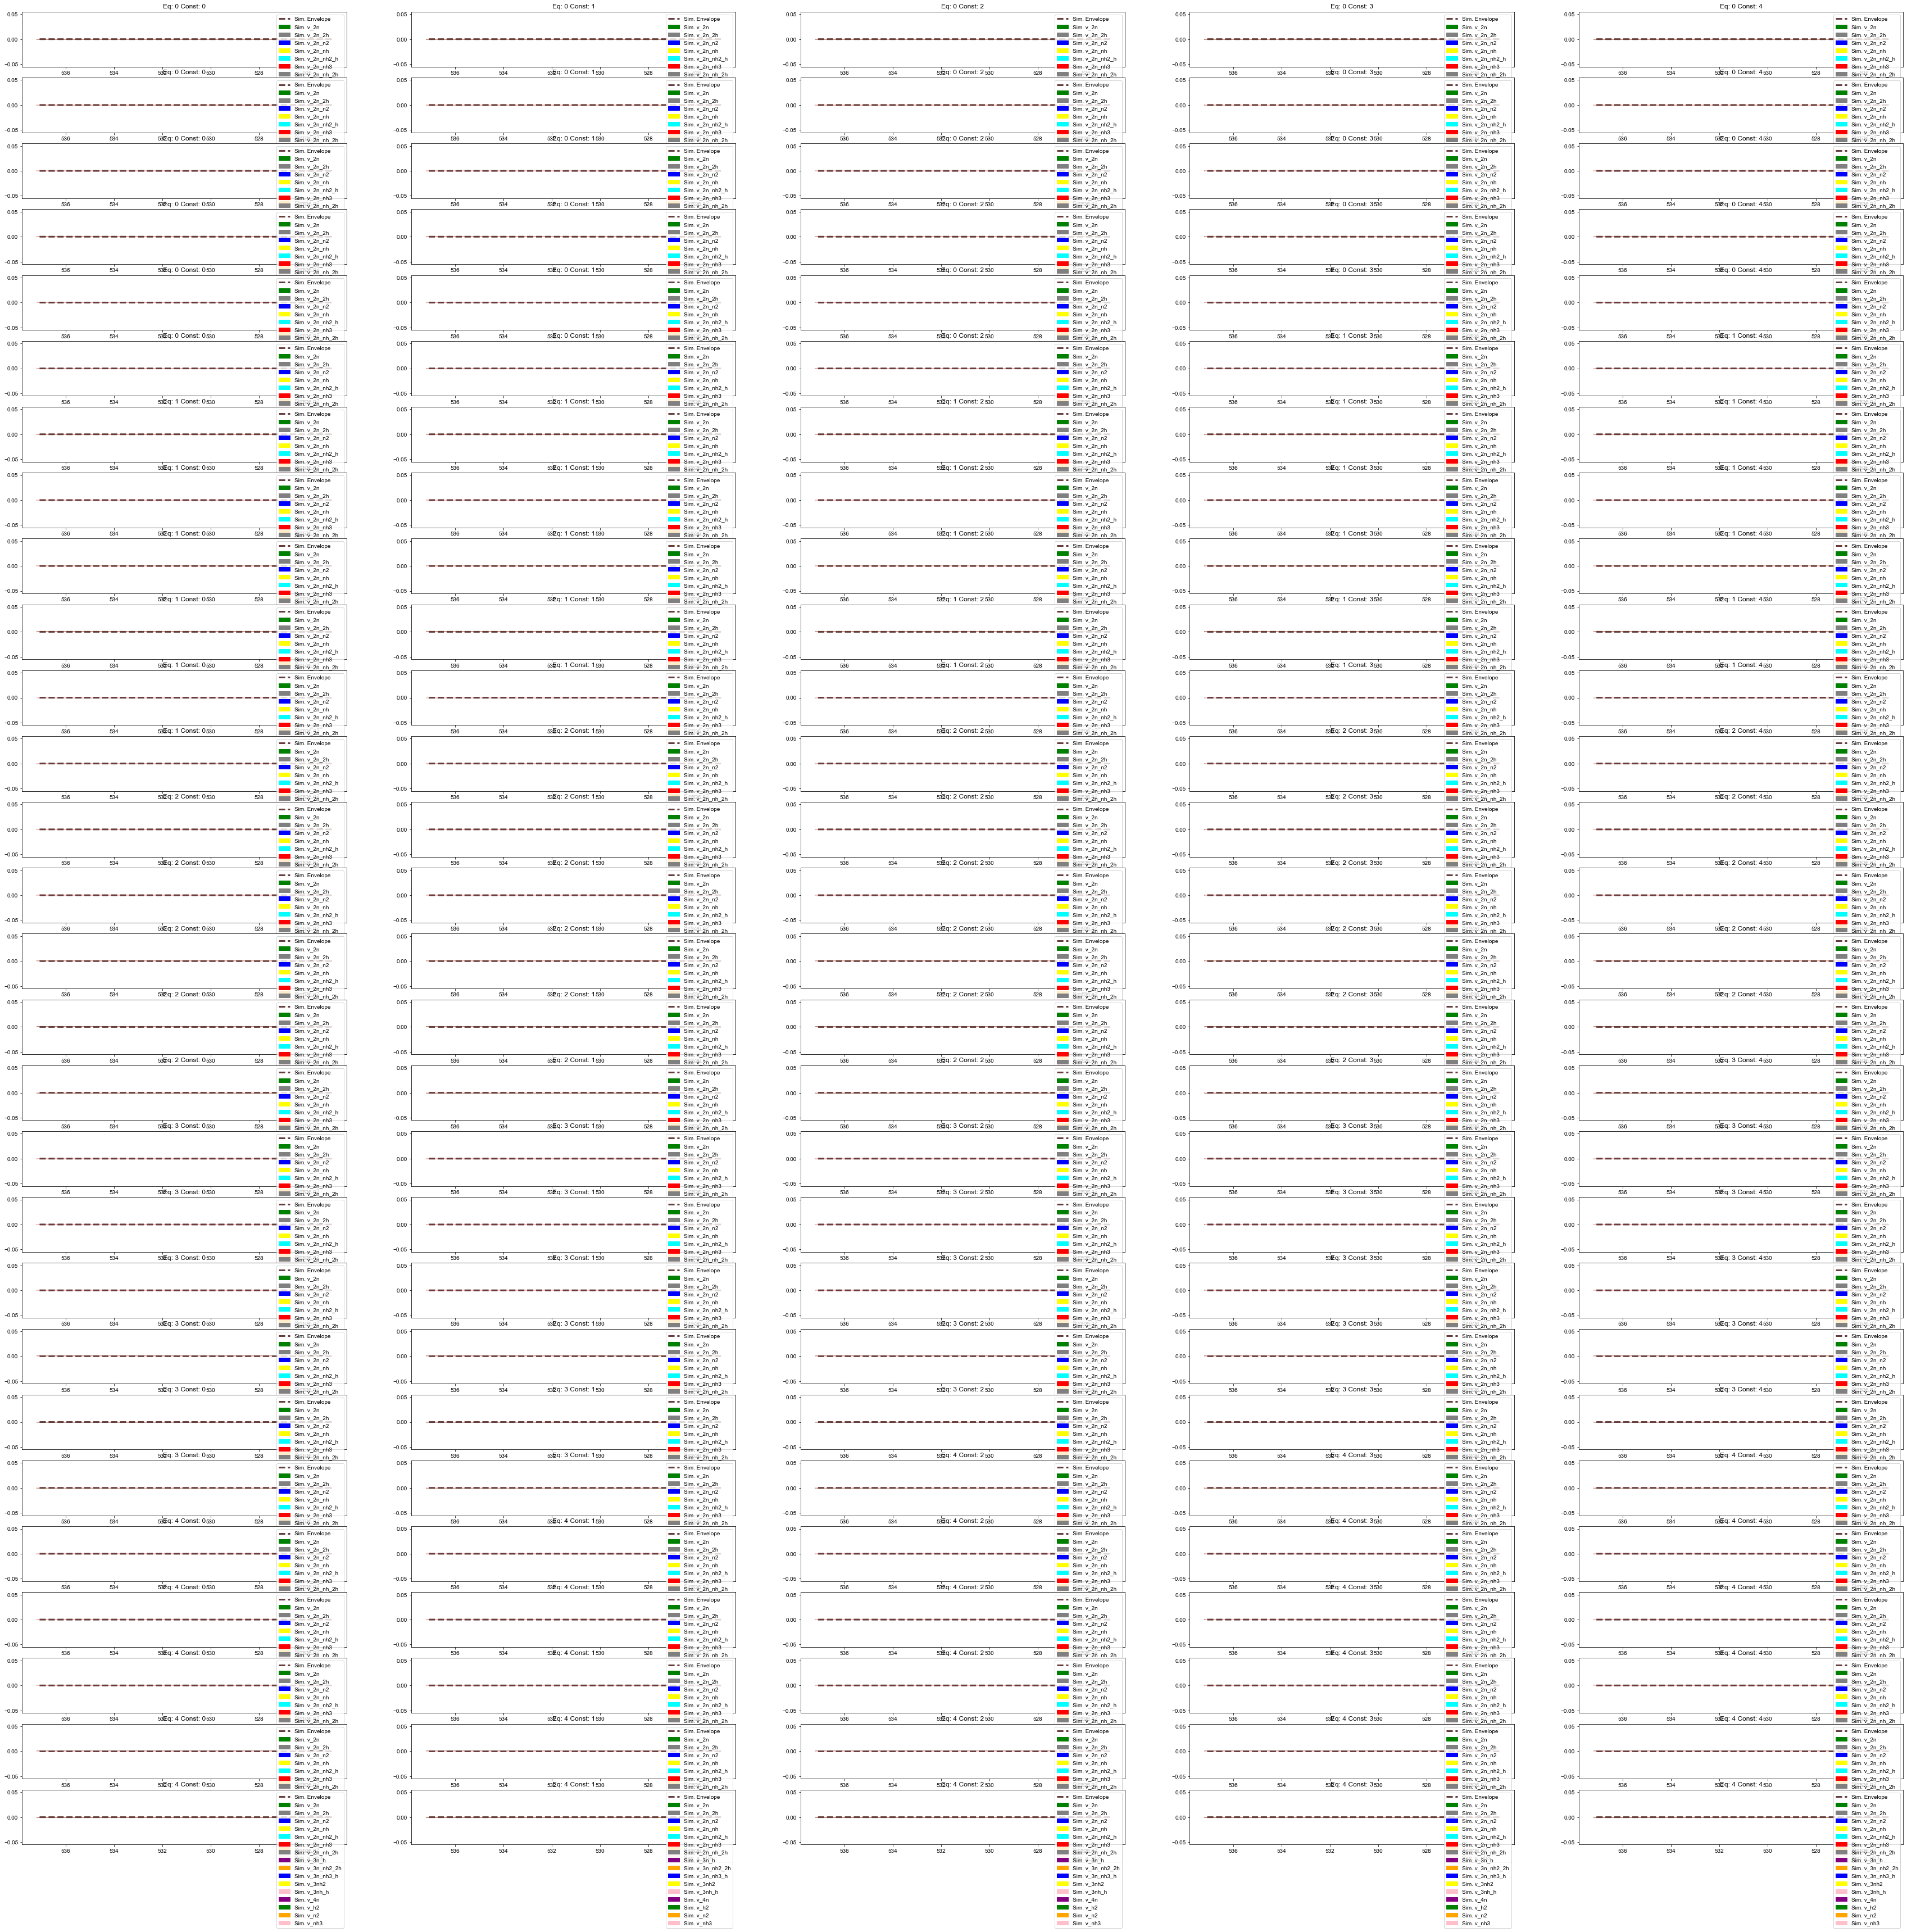

In [7]:
sys.plot(0)

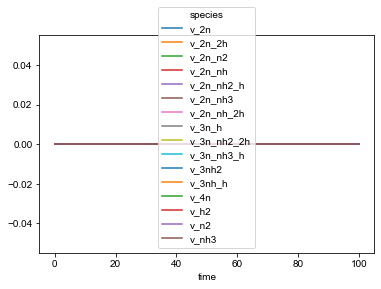

In [9]:
sys.time_series_at(0, 0).plot()